In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)

In [2]:
df = pd.read_csv('data.csv')
df.head()

,brand,model,price_in_pln,mileage,gearbox,engine_capacity,fuel_type,city,voivodeship,year
0,alfa-romeo,Alfa Romeo Spider 2.0-16 TSpark,14700.0,133 760 km,manual,1 970 cm3,Benzyna,Łask,Łódzkie,1998
1,alfa-romeo,Alfa Romeo GTV 2.0 16v TSpark,14000.0,133 760 km,manual,1 970 cm3,Benzyna,Mława,Mazowieckie,1998
2,alfa-romeo,Alfa Romeo 164 2.0 TSpark Super,4500.0,227 000 km,manual,1 970 cm3,Benzyna,Chełmża,Kujawsko-pomorskie,1996
3,alfa-romeo,Alfa Romeo Spider 2.0 TSpark,17100.0,227 000 km,manual,1 970 cm3,Benzyna,Jasło,Podkarpackie,1996
4,alfa-romeo,Alfa Romeo 156 1.6 TSpark 16v,3900.0,239 000 km,manual,1 995 cm3,Benzyna+LPG,Pabianice,Łódzkie,1995


# Data Preprocessing Part 1

In [3]:
#Check the number of unique value from all of the object datatype
df.select_dtypes(include='object').nunique()

brand                 43
model              18641
mileage            14154
gearbox                2
engine_capacity      640
fuel_type           1267
city                4392
voivodeship           26
year                 349
dtype: int64

In [4]:
# Remove model and city because there are alot of unique value
df.drop(columns=['model', 'city', 'fuel_type'],inplace=True)
df.head()

,brand,price_in_pln,mileage,gearbox,engine_capacity,voivodeship,year
0,alfa-romeo,14700.0,133 760 km,manual,1 970 cm3,Łódzkie,1998
1,alfa-romeo,14000.0,133 760 km,manual,1 970 cm3,Mazowieckie,1998
2,alfa-romeo,4500.0,227 000 km,manual,1 970 cm3,Kujawsko-pomorskie,1996
3,alfa-romeo,17100.0,227 000 km,manual,1 970 cm3,Podkarpackie,1996
4,alfa-romeo,3900.0,239 000 km,manual,1 995 cm3,Łódzkie,1995


In [5]:
# Remove string and space from the 'mileage' column
df['mileage'] = df['mileage'].str.replace(r'\D', '', regex=True)
df['mileage'] = df['mileage'].apply(lambda x: float(x) if x != '' else float('nan'))

# Remove the last character from the 'engine_capacity' column
df['engine_capacity'] = df['engine_capacity'].str[:-1]

# Remove string and space from the 'engine_capacity' column
df['engine_capacity'] = df['engine_capacity'].str.replace(r'\D', '', regex=True)
df['engine_capacity'] = df['engine_capacity'].apply(lambda x: float(x) if x != '' else float('nan'))

# Remove string and space from the 'year' column
df['year'] = df['year'].str.replace(r'\D', '', regex=True)
df['year'] = df['year'].apply(lambda x: float(x) if x != '' else float('nan'))

In [6]:
df.dtypes

brand               object
price_in_pln       float64
mileage            float64
gearbox             object
engine_capacity    float64
voivodeship         object
year               float64
dtype: object

In [7]:
df.head()

,brand,price_in_pln,mileage,gearbox,engine_capacity,voivodeship,year
0,alfa-romeo,14700.0,133760.0,manual,1970.0,Łódzkie,1998.0
1,alfa-romeo,14000.0,133760.0,manual,1970.0,Mazowieckie,1998.0
2,alfa-romeo,4500.0,227000.0,manual,1970.0,Kujawsko-pomorskie,1996.0
3,alfa-romeo,17100.0,227000.0,manual,1970.0,Podkarpackie,1996.0
4,alfa-romeo,3900.0,239000.0,manual,1995.0,Łódzkie,1995.0


# Check Year column

In [8]:
df.year.unique()

array([1.99800e+03, 1.99600e+03, 1.99500e+03, 2.00400e+03, 2.00300e+03,
       2.00000e+03, 2.00200e+03, 2.00100e+03, 2.00800e+03, 2.00600e+03,
       2.00900e+03, 2.00700e+03, 2.01500e+03, 2.01600e+03, 2.01700e+03,
       2.01800e+03, 2.01400e+03, 2.01200e+03, 2.01000e+03, 2.01300e+03,
       2.01100e+03, 2.02200e+03, 2.00500e+03, 2.01900e+03, 2.02000e+03,
       2.02100e+03, 2.02300e+03, 1.99900e+03, 1.99700e+03, 5.00000e+00,
       3.99630e+04, 1.98430e+04, 1.49830e+04, 1.96830e+04, 2.48030e+04,
               nan, 5.00000e+01, 5.20430e+04, 1.39530e+04, 2.99530e+04,
       1.00000e+01, 9.40000e+04, 1.99530e+04, 1.99730e+04, 2.99330e+04,
       9.00000e+04, 2.97930e+04, 3.00030e+04, 1.15000e+05, 3.20000e+04,
       4.39530e+04, 7.15000e+04, 4.20050e+04, 4.00000e+04, 1.99830e+04,
       4.40520e+04, 2.01630e+04, 1.49930e+04, 1.95560e+04, 1.49630e+04,
       4.24000e+04, 1.19000e+05, 6.47300e+03, 1.06425e+05, 3.30000e+04,
       1.29600e+05, 2.00030e+04, 3.10000e+04, 2.99830e+04, 6.869

In [9]:
df.shape

(91523, 7)

In [10]:
# Remove rows where year > 2023 or year < 1995
df = df.loc[(df['year'] <= 2023) & (df['year'] >= 1995)]
df.head()

,brand,price_in_pln,mileage,gearbox,engine_capacity,voivodeship,year
0,alfa-romeo,14700.0,133760.0,manual,1970.0,Łódzkie,1998.0
1,alfa-romeo,14000.0,133760.0,manual,1970.0,Mazowieckie,1998.0
2,alfa-romeo,4500.0,227000.0,manual,1970.0,Kujawsko-pomorskie,1996.0
3,alfa-romeo,17100.0,227000.0,manual,1970.0,Podkarpackie,1996.0
4,alfa-romeo,3900.0,239000.0,manual,1995.0,Łódzkie,1995.0


In [11]:
df.shape

(86274, 7)

# Segment Brand Unique Value into Smaller Number

In [12]:
df['brand'].unique()

array(['alfa-romeo', 'aston-martin', 'audi', 'bentley', 'bmw', 'cadillac',
       'chevrolet', 'citroen', 'dacia', 'daewoo', 'daihatsu', 'dodge',
       'ferrari', 'fiat', 'ford', 'honda', 'hyundai', 'infiniti', 'isuzu',
       'jaguar', 'jeep', 'kia', 'lamborghini', 'lancia', 'land-rover',
       'maserati', 'mazda', 'mercedes-benz', 'mini', 'mitsubishi',
       'nissan', 'opel', 'peugeot', 'porsche', 'renault', 'rover', 'saab',
       'seat', 'skoda', 'smart', 'toyota', 'volkswagen', 'volvo'],
      dtype=object)

In [13]:
# Function to segment brands based on car type
def segment_car_type(brand):
    if brand in ['alfa-romeo', 'aston-martin', 'ferrari', 'lamborghini', 'maserati', 'porsche']:
        return 'Sports Car'
    elif brand in ['audi', 'bmw', 'mercedes-benz', 'volkswagen']:
        return 'Luxury Car'
    elif brand in ['cadillac', 'chevrolet', 'ford', 'honda', 'hyundai', 'kia', 'mazda', 'nissan', 'toyota']:
        return 'Sedan'
    elif brand in ['isuzu', 'jeep', 'land-rover']:
        return 'SUV'
    else:
        return 'Other'

# Apply the function to the 'brand' column
df['brand'] = df['brand'].apply(segment_car_type)

<AxesSubplot:>

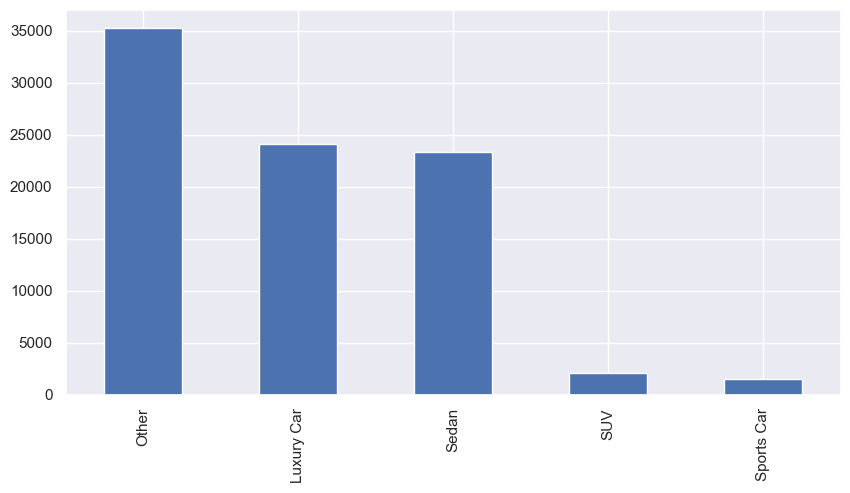

In [14]:
plt.figure(figsize=(10,5))
df['brand'].value_counts().plot(kind='bar')

# Segment Voivodeship Unique Value into Smaller Number

In [15]:
df['voivodeship'].unique()

array(['Łódzkie', 'Mazowieckie', 'Kujawsko-pomorskie', 'Podkarpackie',
       'Wielkopolskie', 'Pomorskie', 'Małopolskie', 'Podlaskie',
       'Śląskie', 'Dolnośląskie', 'Lubelskie', 'Świętokrzyskie',
       'Zachodniopomorskie', 'Lubuskie', 'Opolskie',
       'Warmińsko-mazurskie', 'Praga', 'Moravian-Silesian Region',
       'Brandenburg', 'Rheinland-Pfalz', 'Anglia', 'Berlin', 'Hessen',
       'Jihomoravský kraj', 'Nordrhein-Westfalen'], dtype=object)

In [16]:
# Function to group voivodeships based on regions
def group_voivodeship(voivodeship):
    if voivodeship in ['Łódzkie', 'Mazowieckie', 'Podlaskie', 'Lubelskie', 'Warmińsko-mazurskie']:
        return 'East Poland'
    elif voivodeship in ['Wielkopolskie', 'Dolnośląskie', 'Lubuskie', 'Opolskie']:
        return 'Western Poland'
    elif voivodeship in ['Małopolskie', 'Podkarpackie', 'Świętokrzyskie']:
        return 'South Poland'
    elif voivodeship in ['Pomorskie', 'Zachodniopomorskie']:
        return 'North Poland'
    else:
        return 'Other'

# Apply the function to the 'voivodeship' column
df['voivodeship'] = df['voivodeship'].apply(group_voivodeship)

<AxesSubplot:>

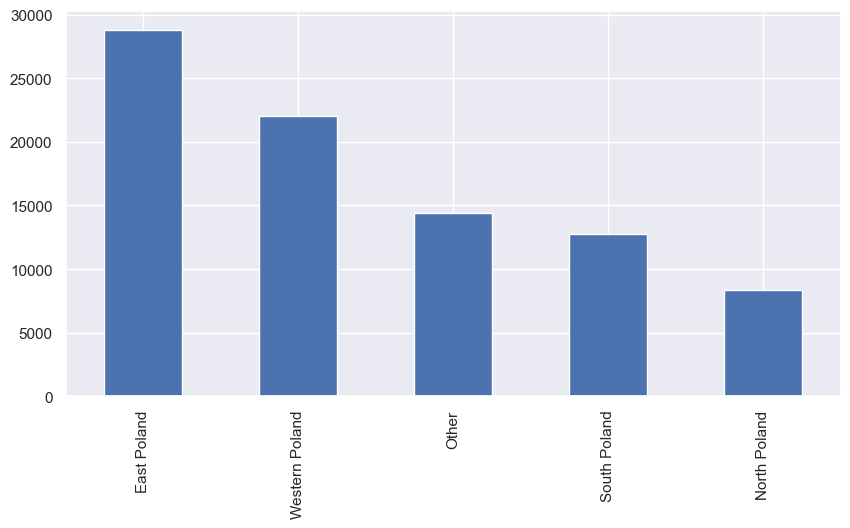

In [17]:
plt.figure(figsize=(10,5))
df['voivodeship'].value_counts().plot(kind='bar')

In [18]:
df.head()

,brand,price_in_pln,mileage,gearbox,engine_capacity,voivodeship,year
0,Sports Car,14700.0,133760.0,manual,1970.0,East Poland,1998.0
1,Sports Car,14000.0,133760.0,manual,1970.0,East Poland,1998.0
2,Sports Car,4500.0,227000.0,manual,1970.0,Other,1996.0
3,Sports Car,17100.0,227000.0,manual,1970.0,South Poland,1996.0
4,Sports Car,3900.0,239000.0,manual,1995.0,East Poland,1995.0


In [19]:
df.dtypes

brand               object
price_in_pln       float64
mileage            float64
gearbox             object
engine_capacity    float64
voivodeship         object
year               float64
dtype: object

In [20]:
#Check the number of unique value from all of the object datatype
df.select_dtypes(include='object').nunique()

brand          5
gearbox        2
voivodeship    5
dtype: int64

# Exploratory Data Analysis

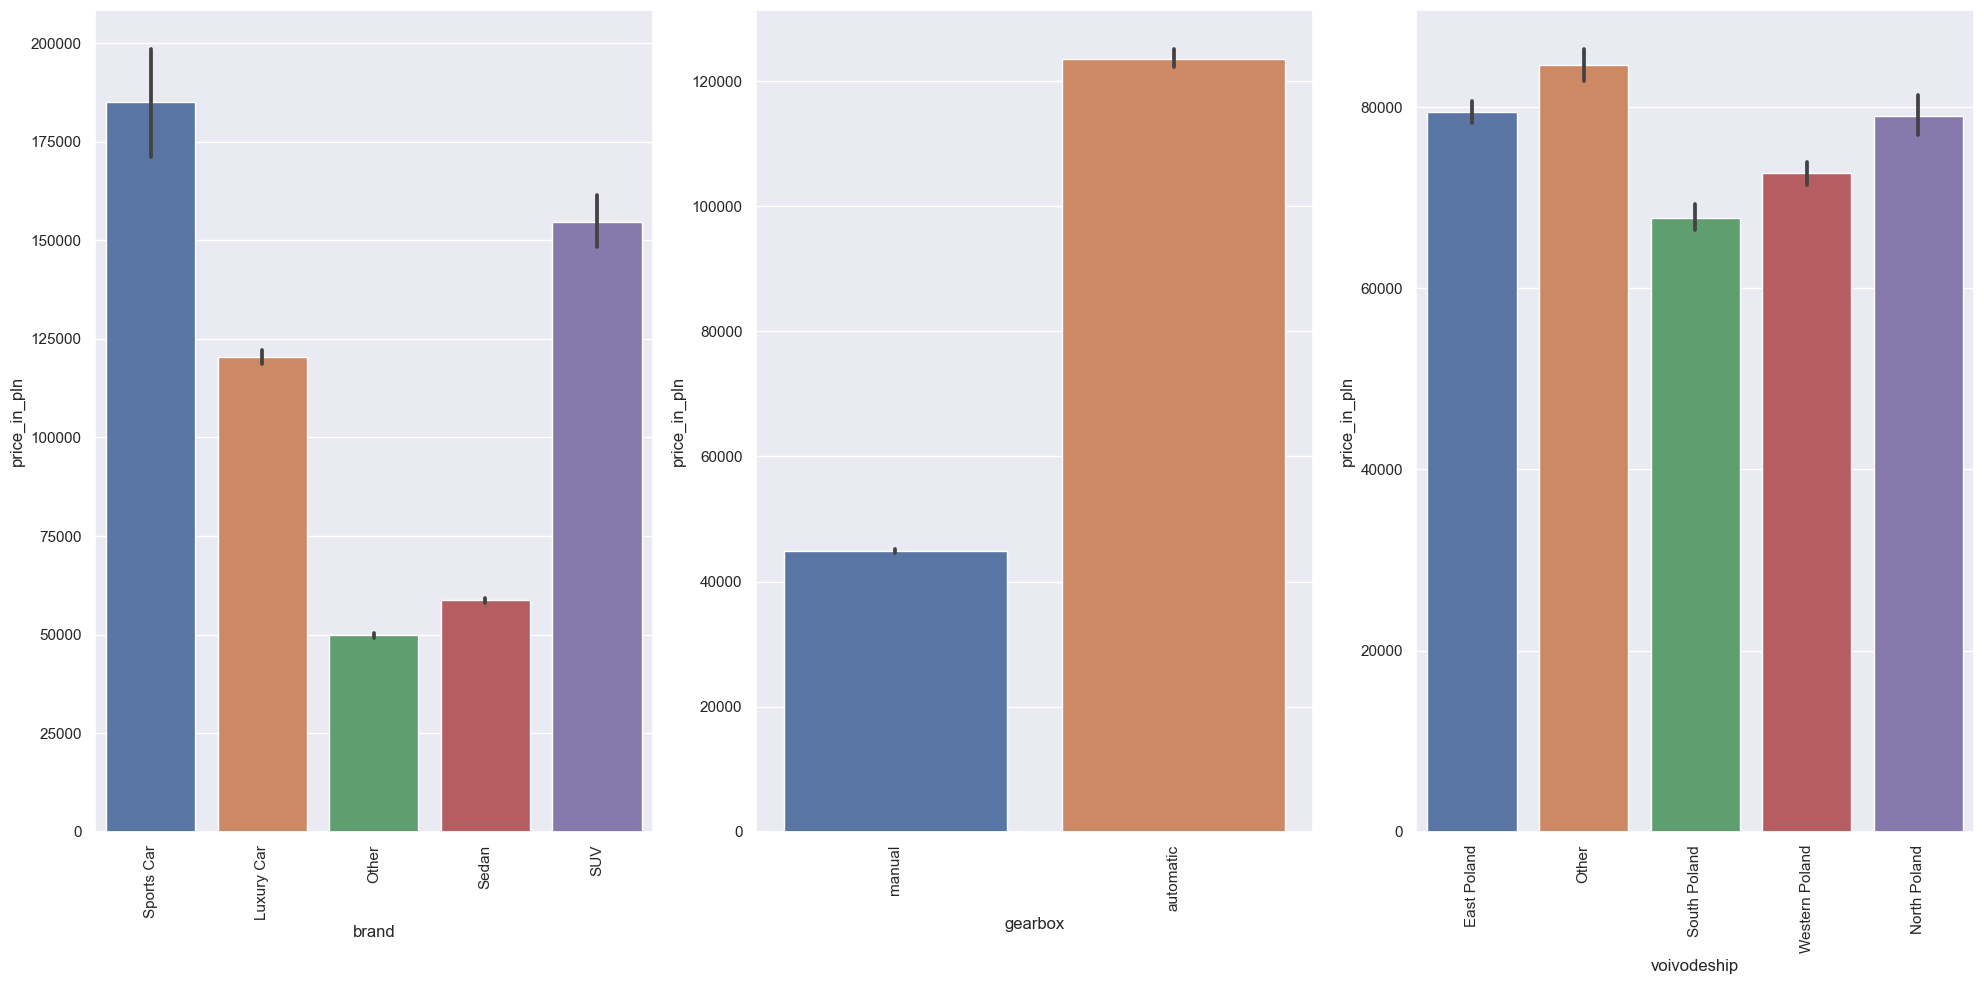

In [21]:
# list of categorical variables to plot
cat_vars = ['brand', 'gearbox', 'voivodeship']

# create figure with subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
axs = axs.ravel()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='price_in_pln', data=df, ax=axs[i], estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

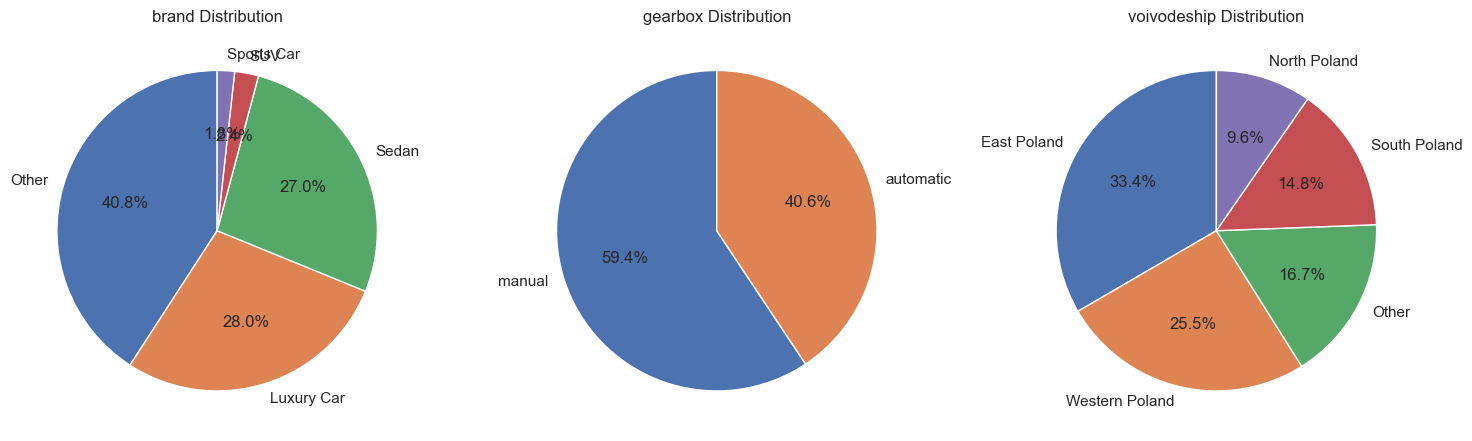

In [22]:
# Specify the maximum number of categories to show individually
max_categories = 5

cat_vars = ['brand', 'gearbox', 'voivodeship']

# Create a figure and axes
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))

# Create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # Count the number of occurrences for each category
        cat_counts = df[var].value_counts()

        # Group categories beyond the top max_categories as 'Other'
        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts[:max_categories]
            cat_counts_other = pd.Series(cat_counts[max_categories:].sum(), index=['Other'])
            cat_counts = cat_counts_top.append(cat_counts_other)

        # Create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # Set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

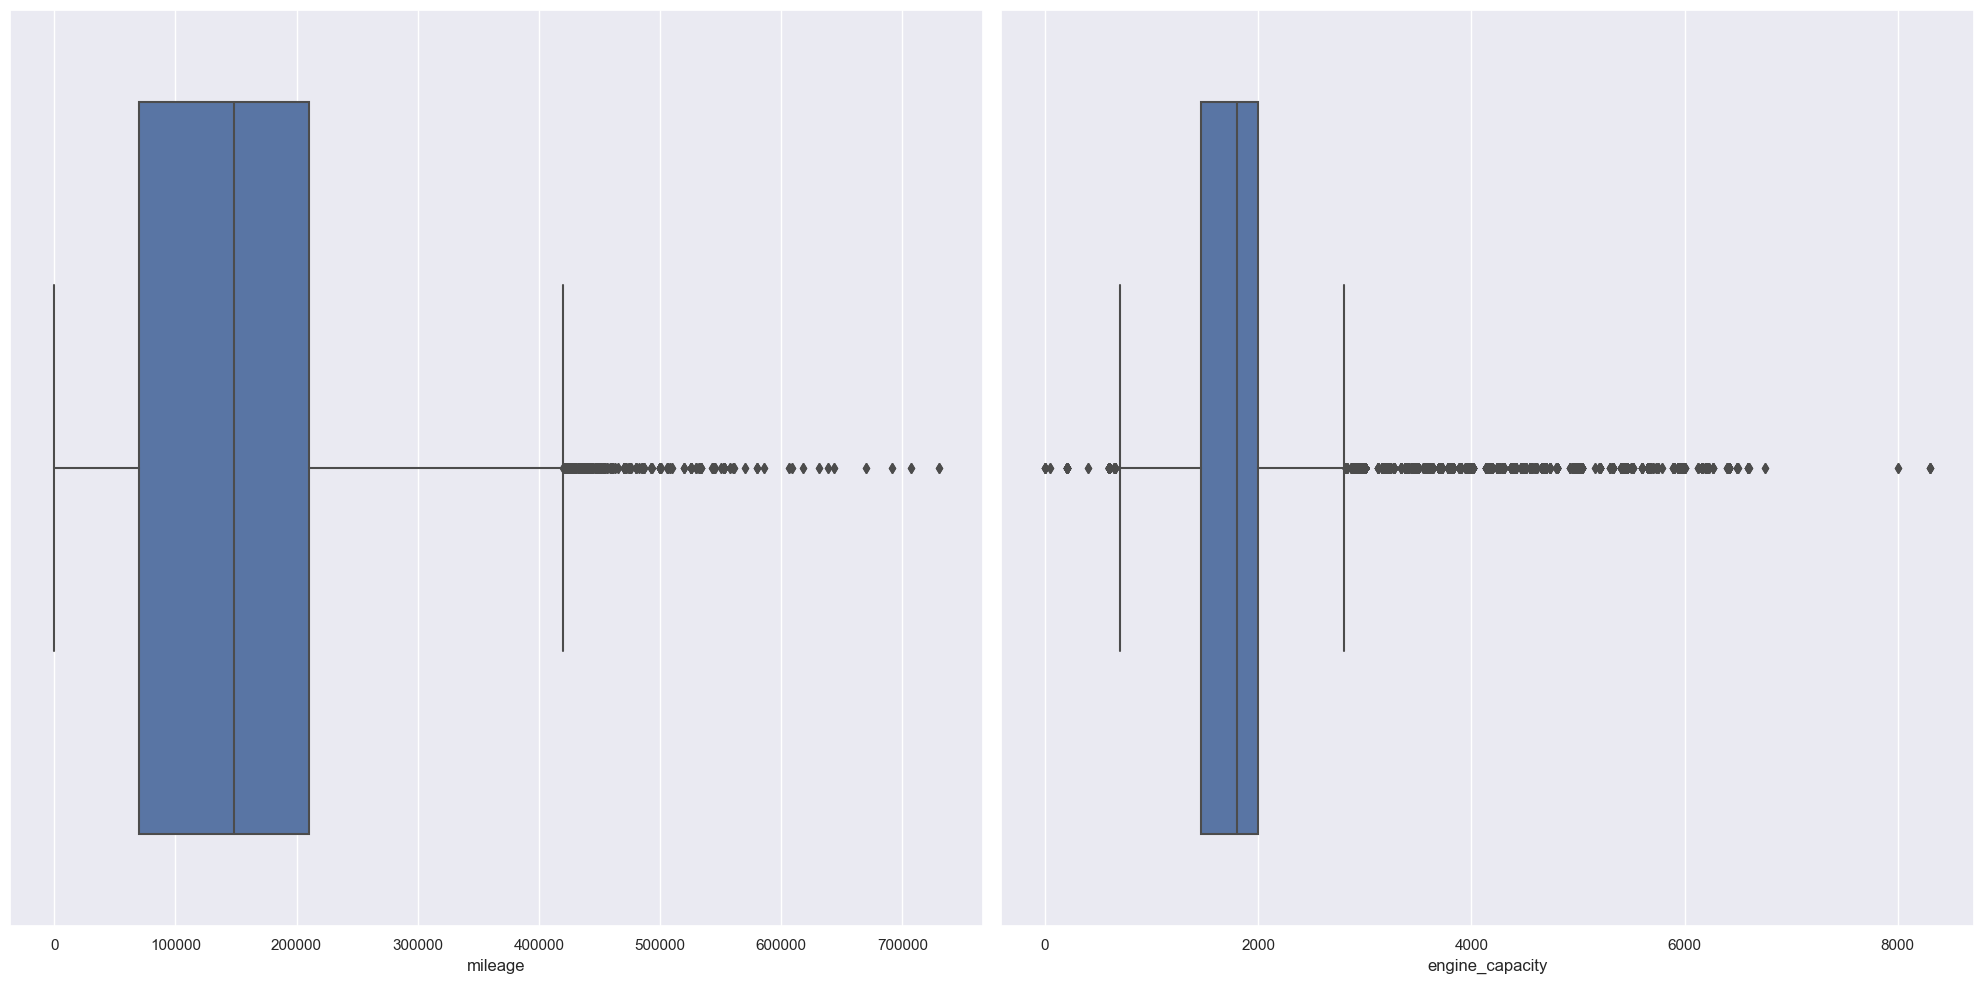

In [23]:
num_vars = ['mileage', 'engine_capacity']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

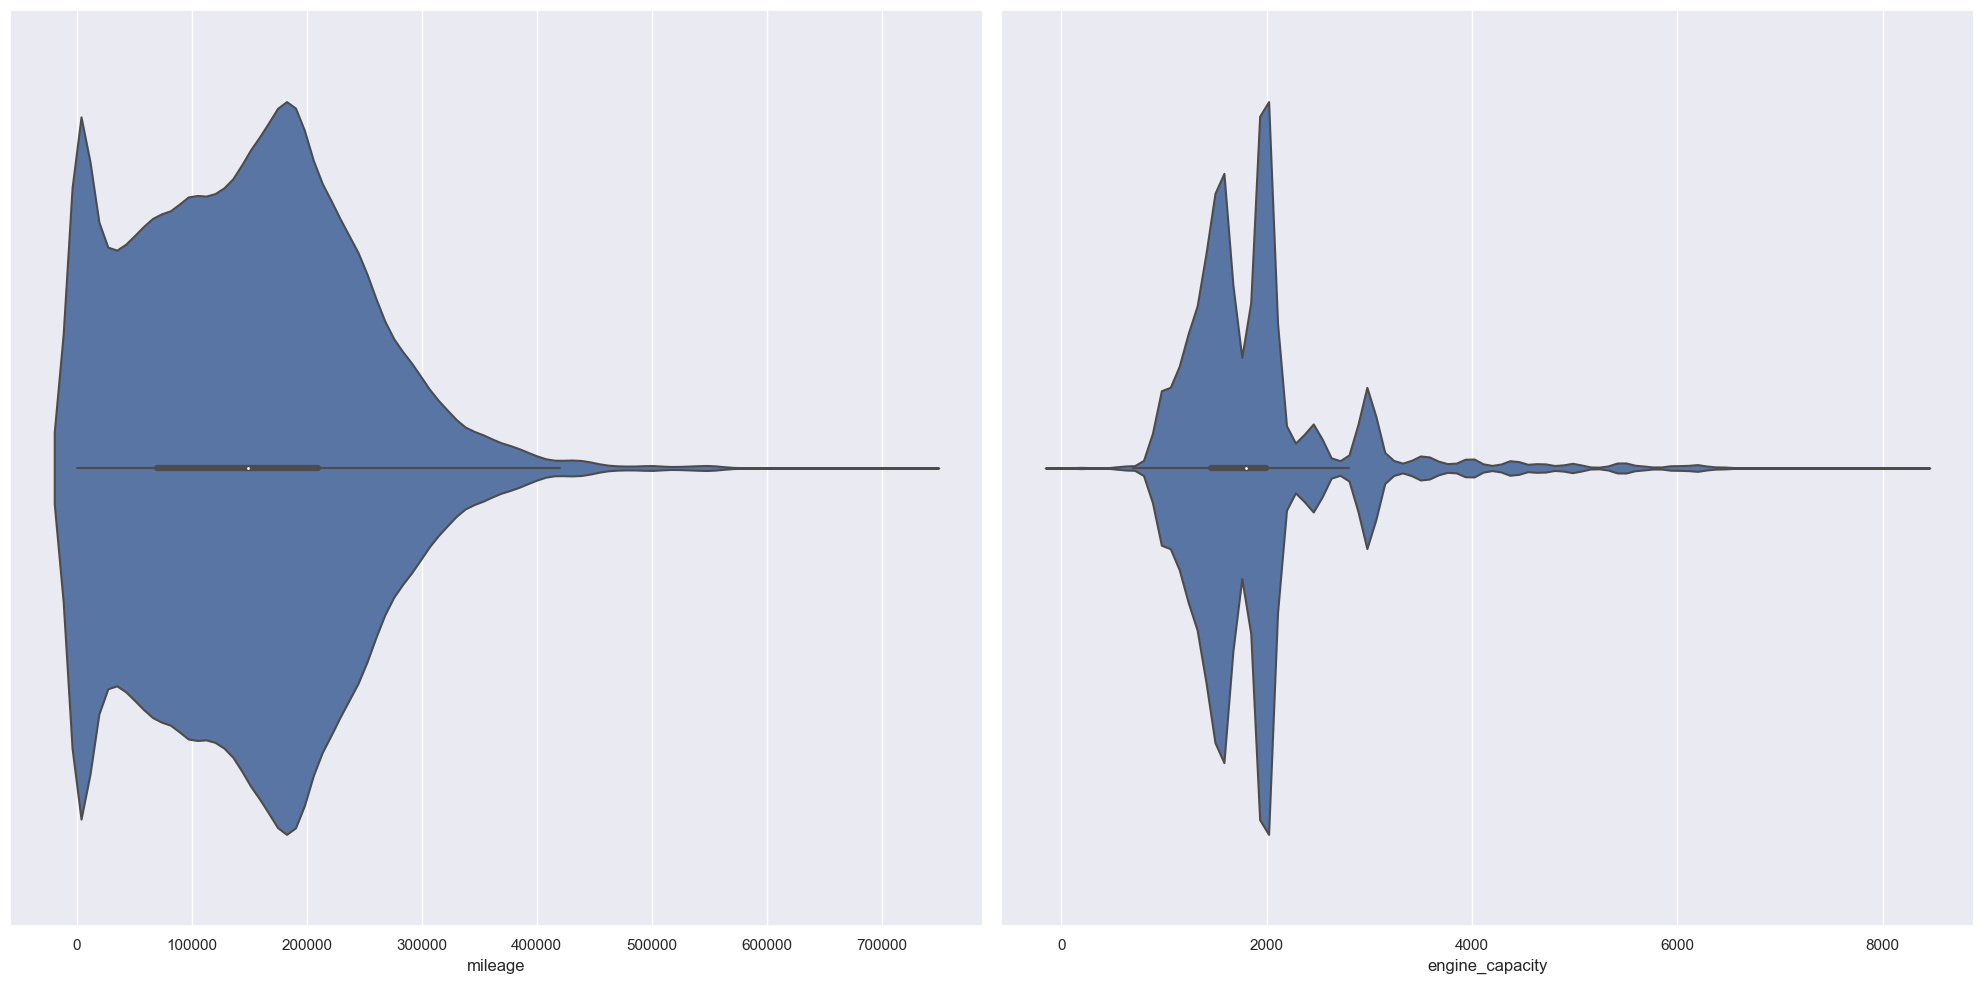

In [24]:
num_vars = ['mileage', 'engine_capacity']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()
plt.show()

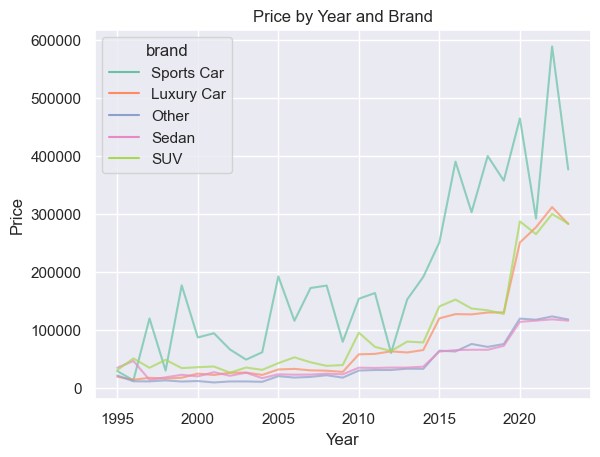

In [25]:
# Set style and palette
sns.set_style("darkgrid")
sns.set_palette("Set2")

# Create line plot
sns.lineplot(x='year', y='price_in_pln', hue='brand', data=df, ci=None, estimator='mean', alpha=0.7)

# Set title, x-label, and y-label
plt.title("Price by Year and Brand")
plt.xlabel("Year")
plt.ylabel("Price")

# Show the plot
plt.show()

# Data Preprocessing Part 2

In [26]:
#Check missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

engine_capacity    0.652572
mileage            0.039409
dtype: float64

In [27]:
df.shape

(86274, 7)

In [28]:
# Drop rows with missing values in 'engine_capacity' and 'mileage' columns
df.dropna(subset=['engine_capacity', 'mileage'], inplace=True)

In [29]:
df.shape

(85677, 7)

# Label Encoding for each Object datatype

In [30]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

brand: ['Sports Car' 'Luxury Car' 'Other' 'Sedan' 'SUV']
gearbox: ['manual' 'automatic']
voivodeship: ['East Poland' 'Other' 'South Poland' 'Western Poland' 'North Poland']


In [31]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

brand: [4 0 1 3 2]
gearbox: [1 0]
voivodeship: [0 2 3 4 1]


# Correlation Heatmap

<AxesSubplot:>

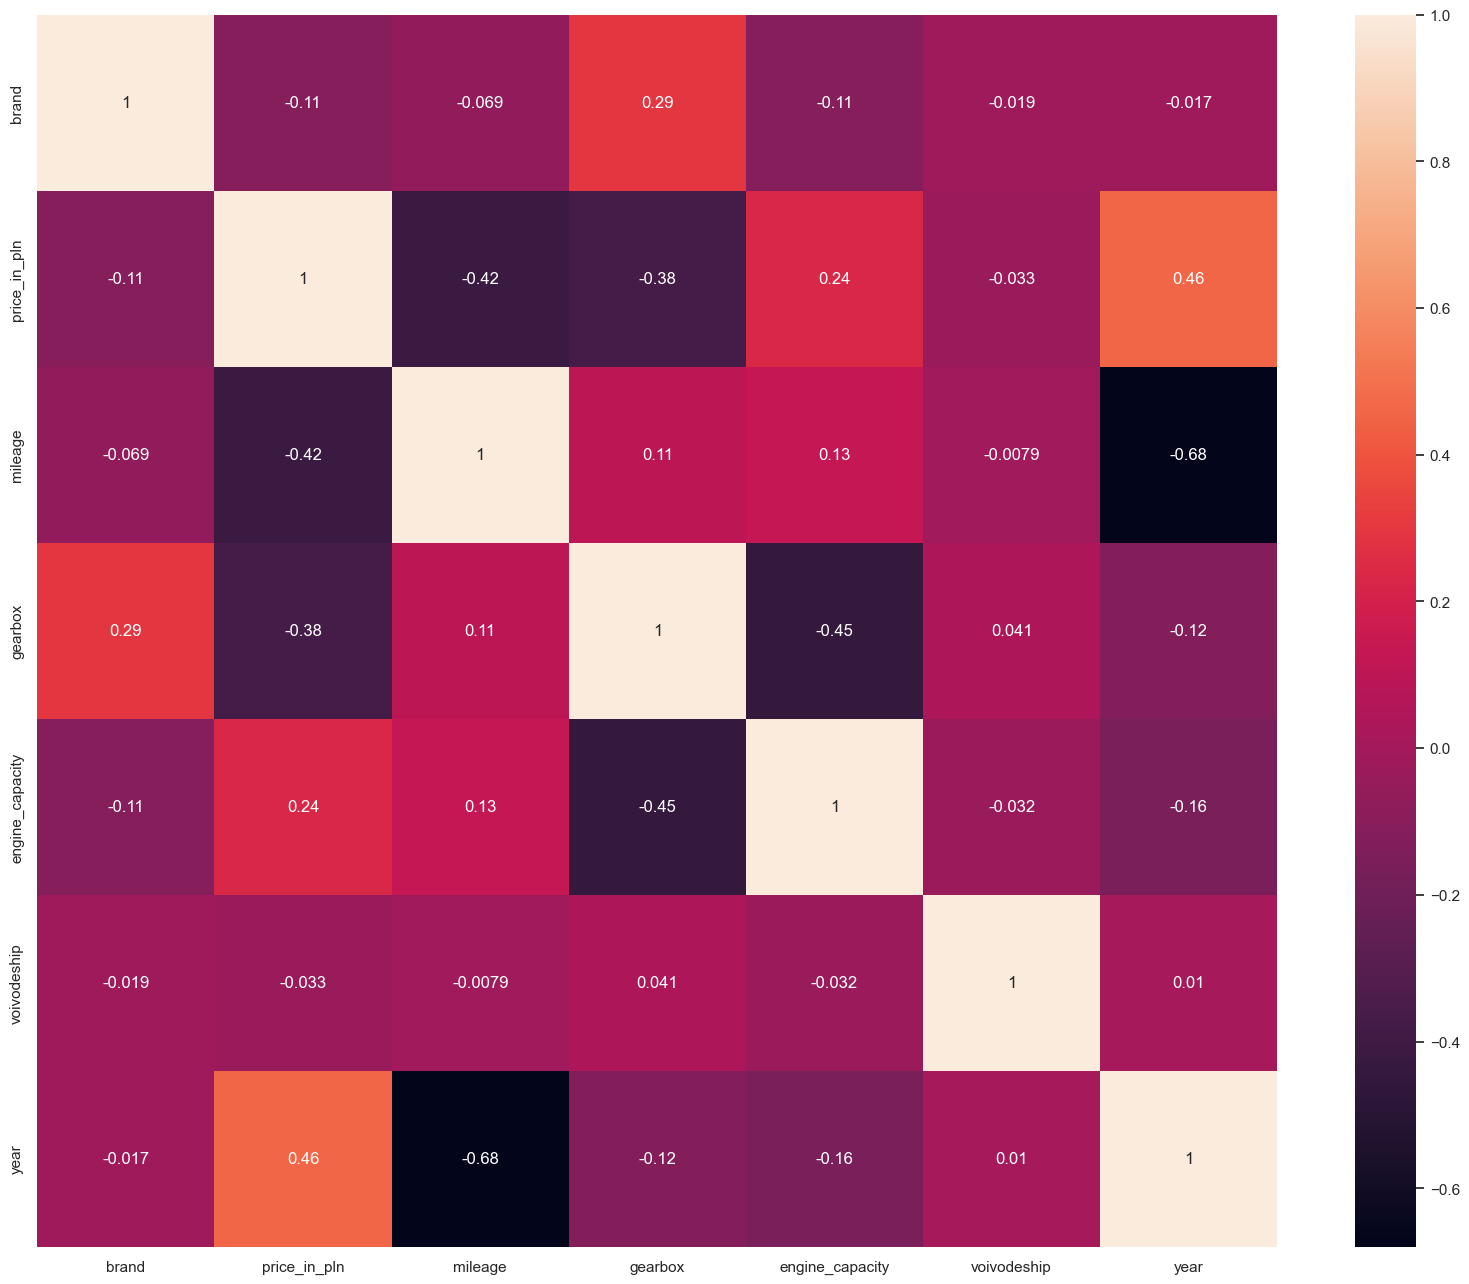

In [32]:
#Correlation Heatmap (print the correlation score each variables)
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

# Train Test Split

In [34]:
from sklearn.model_selection import train_test_split
# Select the features (X) and the target variable (y)
X = df.drop('price_in_pln', axis=1)
y = df['price_in_pln']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Remove the Outlier from train data using Z-Score

In [35]:
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['mileage', 'engine_capacity']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

# Decision Tree Regressor

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston


# Create a DecisionTreeRegressor object
dtree = DecisionTreeRegressor()

# Define the hyperparameters to tune and their values
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [0, 42]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 6, 'random_state': 42}


In [37]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=42, max_depth=8, max_features='auto', min_samples_leaf=2, min_samples_split=6)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=2,
                      min_samples_split=6, random_state=42)

In [38]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 29346.001362301686
MAPE is 0.5111408100820609
MSE is 4873280058.793767
R2 score is 0.5364764844915675
RMSE score is 69808.88237748666


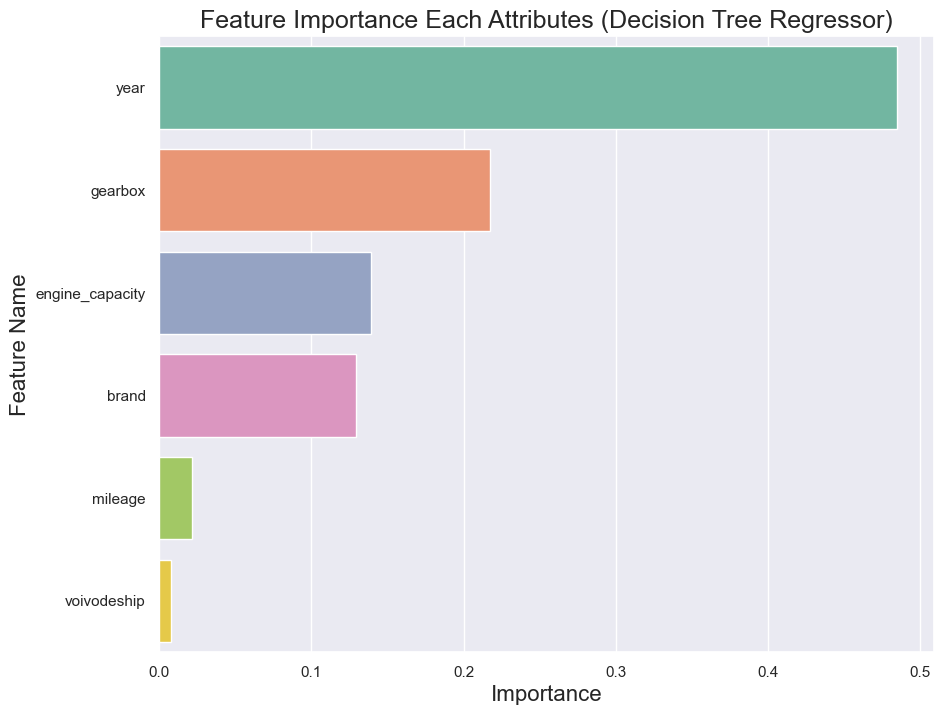

In [39]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

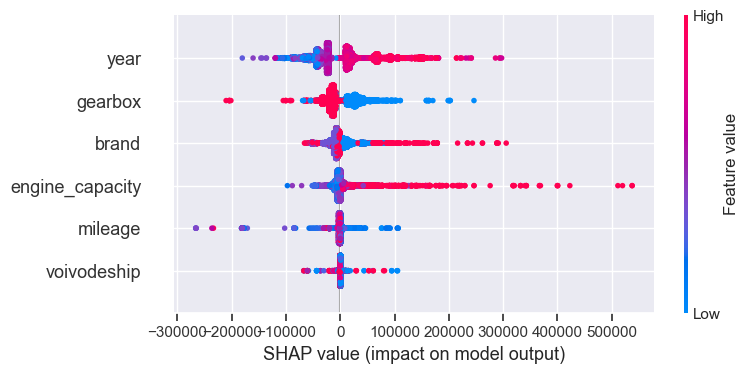

In [40]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

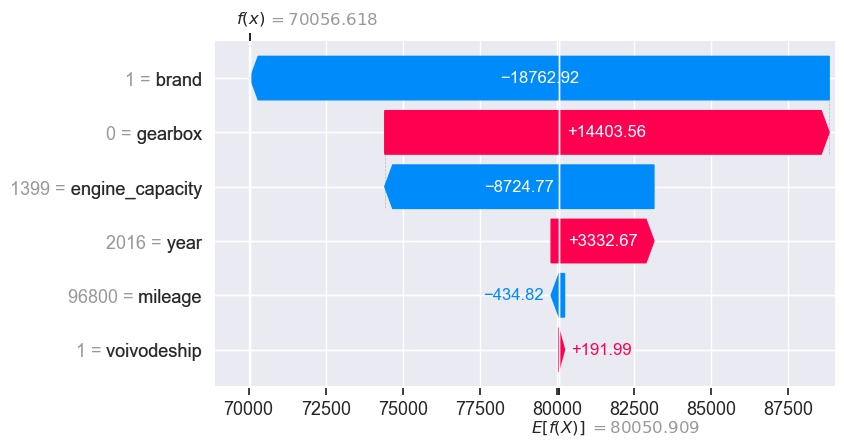

In [41]:
explainer = shap.Explainer(dtree, X_test)
shap_values = explainer(X_test)
shap.plots.waterfall(shap_values[0])

# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create a Random Forest Regressor object
rf = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'random_state': [0, 42]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

In [43]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42, max_depth=9, min_samples_split=10, min_samples_leaf=2, 
                           max_features='auto')
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=9, min_samples_leaf=2, min_samples_split=10,
                      random_state=42)

In [44]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 29117.683244991076
MAPE is 0.4978528795792257
MSE is 4784075115.395197
R2 score is 0.5449612398239074
RMSE score is 69167.00886546416


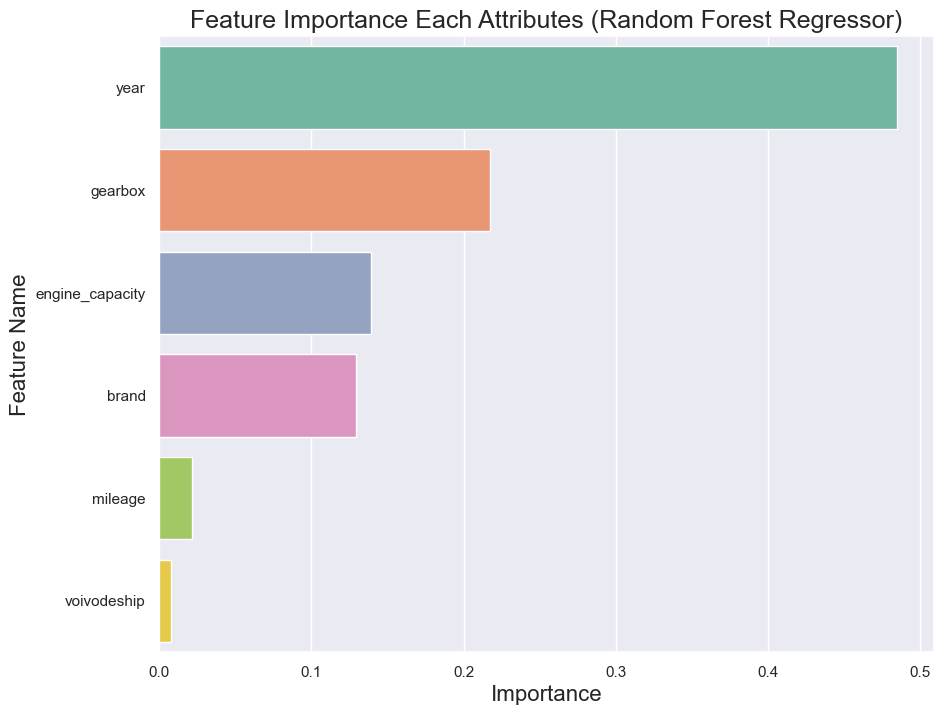

In [45]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Random Forest Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

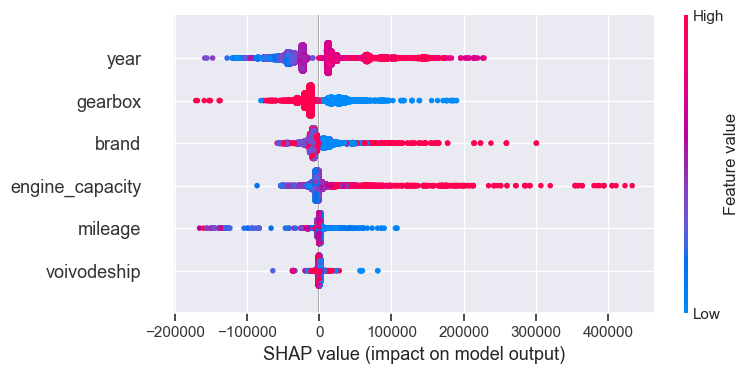

In [46]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

100%|===================| 17101/17136 [02:13<00:00]        

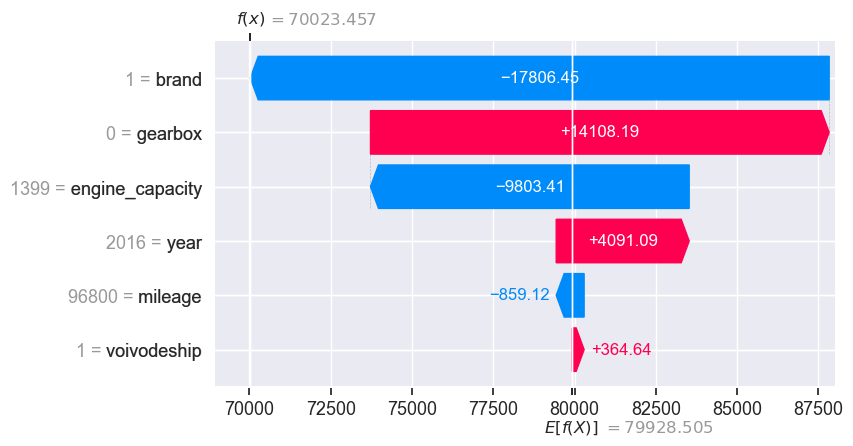

In [47]:
explainer = shap.Explainer(rf, X_test, check_additivity=False)
shap_values = explainer(X_test, check_additivity=False)
shap.plots.waterfall(shap_values[0])